In [19]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
#!output: false
mnist_dataset = torchvision.datasets.MNIST(root="mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



Image shape: torch.Size([1, 28, 28])
Image min and max: tensor(0.) tensor(1.)
label: 5


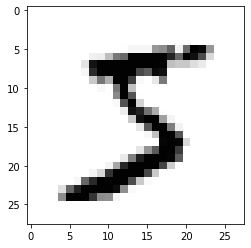

In [5]:
# View an example
im, label = mnist_dataset[0]
print('Image shape:', im.shape)
print('Image min and max:', im.min(), im.max())
print('label:', label)
plt.imshow(im[0], cmap='Greys');

In [9]:
# See how we can make a dataloader to serve the data in batches for training
train_dataloader = DataLoader(mnist_dataset, batch_size=8, shuffle=True)
x, y = next(iter(train_dataloader))
x.shape, y

(torch.Size([8, 1, 28, 28]), tensor([3, 8, 8, 4, 8, 3, 8, 2]))

In [12]:
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption

In [13]:
amount

tensor([0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000])

In [17]:
amount.view(-1, 1, 1, 1).shape

torch.Size([8, 1, 1, 1])

In [15]:
x.shape

torch.Size([8, 1, 28, 28])

Write a function add noise to an image

In [10]:
def corrupt(x, amount):
    """Corrupt the input `x` by mixing it with noise according to `amount`"""
    noise = torch.rand_like(x)
    amount = amount.view(-1, 1, 1, 1) # Sort shape so broadcasting works
    return x*(1-amount) + noise*amount

`x` is a batch of 8 black-white images

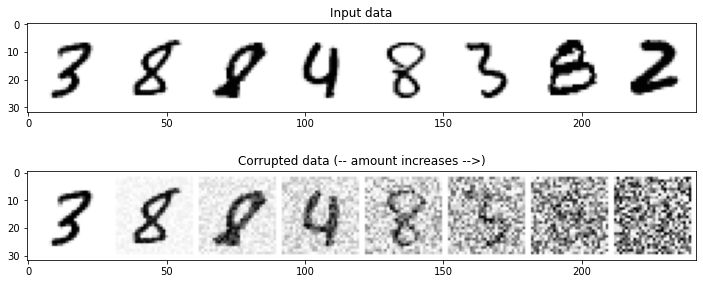

In [18]:
#|echo: false
# Visualize the process
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0], cmap='Greys')

axs[1].set_title('Corrupted data (-- amount increases -->)')
noised_x = corrupt(x, amount)
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap='Greys');

### The Model

In [ ]:
class BasicConvNet(nn.Module):
    def __init__(self, )